<a href="https://colab.research.google.com/github/Masakinka/python_for_ds_task/blob/main/HW_2_5_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
cars_df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/cars.csv")

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [ ]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [ ]:
# Відображення типів даних всіх колонок
data_types = cars_df.dtypes

# Визначення унікальних значень і їх кількість для кожної категоріальної колонки
categorical_columns = cars_df.select_dtypes(include=['object']).columns
unique_values = {col: cars_df[col].unique() for col in categorical_columns}
nunique_values = {col: cars_df[col].nunique() for col in categorical_columns}

# Створення зведеної DataFrame
summary_unique_values = {
    "Column": categorical_columns,
    "Unique Values": [unique_values[col] for col in categorical_columns],
    "Number of Unique Values": [nunique_values[col] for col in categorical_columns]
}

unique_values_df = pd.DataFrame(summary_unique_values)

# Відображення типів даних
print("Column Data Types:")
print(data_types)

# Відображення  зведених даних DataFrame
print("\nUnique Values in Categorical Columns:")
print(unique_values_df)

Column Data Types:
Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

Unique Values in Categorical Columns:
         Column                                      Unique Values  Number of Unique Values
0         Brand  [Toyota, Honda, Ford, Maruti, Hyundai, Tata, M...                       11
1         Model  [Corolla, Civic, Mustang, Swift, Sonata, Nexon...                       58
2     Fuel_Type                                   [Petrol, Diesel]                        2
3  Transmission                                [Manual, Automatic]                        2
4    Owner_Type                             [First, Second, Third]                        3



В наборі даних 8 числових і 5 категоріальних колонок, з них
- 2 бінарні (мають лише 2 значення): Fuel_Type, Transmission
- 2 мультикатегоріальні (більше 2 значень) зі значеннями, для яких немає відношення порядку: Brand, Model
- 1 колонка Owner_Type, в якій можна встановити відношення порядку (наприклад First<Second<Third)


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [ ]:
# Визначення цільової змінної
target = 'Price'
X = cars_df.drop(columns=[target])
y = cars_df[target]

# Розділення даних на тренувальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Відображення розмірів отриманих наборів
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (80, 12)
X_test shape: (20, 12)
y_train shape: (80,)
y_test shape: (20,)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [ ]:
# Бінарне кодування колонок Fuel_Type і Transmission
X_train['Fuel_Type_Code'] = X_train['Fuel_Type'].apply(lambda x: 1 if x == 'Petrol' else 0)
X_test['Fuel_Type_Code'] = X_test['Fuel_Type'].apply(lambda x: 1 if x == 'Petrol' else 0)

X_train['Transmission_Code'] = X_train['Transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)
X_test['Transmission_Code'] = X_test['Transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)

X_train.head(), X_test.head()

(    Car_ID       Brand  Model  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  Fuel_Type_Code  Transmission_Code
 83      84  Volkswagen  T-Roc  2019              22000    Petrol    Automatic     Second       18    1498    148      5               1                  1
 55      56        Audi     A5  2018              28000    Diesel    Automatic      First       17    1968    187      5               0                  1
 26      27        Audi     A6  2018              28000    Petrol    Automatic      First       15    1984    241      5               1                  1
 54      55  Volkswagen  Vento  2017              32000    Petrol       Manual     Second       18    1598    103      5               1                  0
 19      20    Mercedes    GLC  2017              26000    Petrol    Automatic     Second       12    1991    241      5               1                  1,
     Car_ID       Brand   Model  Year  Kilometers_Driven Fuel_T

In [ ]:
# One-Hot кодування колонки Brand
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train[['Brand']])
brand_train_encoded = onehot_encoder.transform(X_train[['Brand']]).toarray()
brand_test_encoded = onehot_encoder.transform(X_test[['Brand']]).toarray()

brand_cols = onehot_encoder.get_feature_names_out(['Brand'])
#X_train = X_train.drop(columns=['Brand']).reset_index(drop=True)
#X_test = X_test.drop(columns=['Brand']).reset_index(drop=True)

X_train[brand_cols] = brand_train_encoded
X_test[brand_cols] = brand_test_encoded

In [ ]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [ ]:
X_test.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00


(None, None)

Для зменшення кількості унікальних значень у колонці Model, ми можемо згрупувати моделі за виробником або за категоріями автомобілів (наприклад, седани, позашляховики, компактні автомобілі тощо). Оскільки у нас вже є колонка Brand, ми можемо згрупувати моделі за типами автомобілів.

Ось обрані категорій для колонок Model:
- Sedan ('Corolla', 'Civic', 'Sonata', 'A4', '3 Series', 'Verna', 'Elantra')
- SUV ('Tiguan', 'Q3', 'X1', 'GLC', 'Fortuner', 'Harrier', 'Ertiga', 'Thar', 'Safari')
- Hatchback ('Swift', 'Polo', 'Figo', 'Altroz', 'WR-V', 'Santro', 'Tiago', 'Ameo')
- Luxury ('Mustang', '5 Series', 'E-Class', '7 Series', 'GLE')
- Other

In [ ]:
# Створення нової колонки 'Model_Group' з категоріями моделей
def categorize_model(model):
    sedans = ['Corolla', 'Civic', 'Sonata', 'A4', '3 Series', 'Verna', 'Elantra']
    suvs = ['Tiguan', 'Q3', 'X1', 'GLC', 'Fortuner', 'Harrier', 'Ertiga', 'Thar', 'Safari']
    hatchbacks = ['Swift', 'Polo', 'Figo', 'Altroz', 'WR-V', 'Santro', 'Tiago', 'Ameo']
    luxury = ['Mustang', '5 Series', 'E-Class', '7 Series', 'GLE']

    if model in sedans:
        return 'Sedan'
    elif model in suvs:
        return 'SUV'
    elif model in hatchbacks:
        return 'Hatchback'
    elif model in luxury:
        return 'Luxury'
    else:
        return 'Other'

# Додавання нової колонки 'Model_Group'
X_train['Model_Group'] = X_train['Model'].apply(categorize_model)
X_test['Model_Group'] = X_test['Model'].apply(categorize_model)

In [ ]:
# One-Hot кодування нової колонки 'Model_Group'
model_group_encoder = OneHotEncoder()
model_group_encoder.fit(X_train[['Model_Group']])
model_group_train_encoded = model_group_encoder.transform(X_train[['Model_Group']]).toarray()
model_group_test_encoded = model_group_encoder.transform(X_test[['Model_Group']]).toarray()

model_group_cols = model_group_encoder.get_feature_names_out(['Model_Group'])
#X_train = X_train.drop(columns=['Model']).reset_index(drop=True)
#X_test = X_test.drop(columns=['Model']).reset_index(drop=True)

X_train[model_group_cols] = model_group_train_encoded
X_test[model_group_cols] = model_group_test_encoded

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Model_Group,Model_Group_Hatchback,Model_Group_Luxury,Model_Group_Other,Model_Group_SUV,Model_Group_Sedan
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,Other,0.00,0.00,1.00,0.00,0.00
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Other,0.00,0.00,1.00,0.00,0.00
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Other,0.00,0.00,1.00,0.00,0.00
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,Other,0.00,0.00,1.00,0.00,0.00
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,SUV,0.00,0.00,0.00,1.00,0.00


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Model_Group,Model_Group_Hatchback,Model_Group_Luxury,Model_Group_Other,Model_Group_SUV,Model_Group_Sedan
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,SUV,0.00,0.00,0.00,1.00,0.00
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,Hatchback,1.00,0.00,0.00,0.00,0.00
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,Other,0.00,0.00,1.00,0.00,0.00
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,SUV,0.00,0.00,0.00,1.00,0.00
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,Other,0.00,0.00,1.00,0.00,0.00


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [ ]:
# Обираємо лише числові колонки з X_train
numerical_X_train = X_train.select_dtypes(include=['number'])

# Об'єднуємо ці дані з y_train
train_data = pd.concat([numerical_X_train, y_train.reset_index(drop=True)], axis=1)

# Побудова матриці кореляції
correlation_matrix = train_data.corr()

In [ ]:
correlation_matrix

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Model_Group_Hatchback,Model_Group_Luxury,Model_Group_Other,Model_Group_SUV,Model_Group_Sedan,Price
Car_ID,1.00,0.14,-0.36,0.10,-0.09,-0.01,-0.06,0.09,-0.08,0.09,0.05,-0.02,-0.05,0.02,0.01,-0.05,-0.05,-0.03,0.01,0.02,0.04,0.06,-0.06,0.14,-0.15,-0.11,-0.01
Year,0.14,1.00,-0.71,0.28,-0.39,-0.25,-0.28,0.25,-0.20,-0.26,0.20,-0.15,-0.04,-0.09,0.18,0.29,-0.12,0.25,-0.22,0.02,-0.01,0.42,-0.05,-0.28,-0.01,0.04,-0.06
Kilometers_Driven,-0.36,-0.71,1.00,-0.13,0.10,-0.06,0.40,-0.33,-0.07,0.10,-0.25,-0.01,0.06,0.15,-0.04,-0.19,-0.09,0.03,0.37,-0.14,-0.00,-0.32,-0.16,0.17,0.12,0.16,0.12
Mileage,0.10,0.28,-0.13,1.00,-0.71,-0.68,-0.18,-0.07,-0.40,-0.15,-0.13,-0.30,0.36,0.22,0.03,0.12,-0.24,0.35,-0.20,0.09,0.03,0.52,-0.34,-0.04,-0.28,0.08,-0.06
Engine,-0.09,-0.39,0.10,-0.71,1.00,0.80,0.17,-0.17,0.46,0.09,0.29,0.18,-0.15,-0.18,-0.02,-0.19,0.16,-0.34,0.23,-0.17,-0.20,-0.40,0.47,-0.06,0.15,-0.10,0.04
Power,-0.01,-0.25,-0.06,-0.68,0.80,1.00,-0.14,0.08,0.59,0.16,0.37,0.24,-0.19,-0.17,-0.12,-0.22,0.28,-0.32,-0.04,-0.15,-0.20,-0.41,0.62,-0.13,0.02,-0.01,-0.09
Seats,-0.06,-0.28,0.40,-0.18,0.17,-0.14,1.00,-0.41,-0.07,0.12,-0.11,-0.16,0.20,-0.09,0.01,-0.08,-0.11,-0.01,0.35,-0.09,-0.04,-0.12,-0.27,0.20,0.23,-0.10,0.18
Fuel_Type_Code,0.09,0.25,-0.33,-0.07,-0.17,0.08,-0.41,1.00,-0.01,-0.01,-0.05,0.11,-0.16,-0.01,-0.24,0.15,-0.05,0.07,-0.01,0.13,0.28,0.17,-0.01,-0.05,-0.20,0.08,0.05
Transmission_Code,-0.08,-0.20,-0.07,-0.40,0.46,0.59,-0.07,-0.01,1.00,0.27,0.28,-0.12,-0.22,0.03,-0.17,-0.11,0.28,-0.40,-0.08,0.16,0.01,-0.35,0.30,-0.08,0.03,0.18,-0.16
Brand_Audi,0.09,-0.26,0.10,-0.15,0.09,0.16,0.12,-0.01,0.27,1.00,-0.12,-0.12,-0.09,-0.09,-0.08,-0.09,-0.12,-0.13,-0.11,-0.10,-0.20,-0.13,-0.13,0.29,-0.09,-0.11,0.09


In [ ]:
# Поиск всех корреляций для 'Price'
all_correlations = correlation_matrix['Price'].abs()
print(all_correlations.sort_values(ascending=False))

Price                   1.00
Brand_Mahindra          0.25
Brand_Maruti            0.23
Brand_Mercedes          0.22
Brand_Ford              0.18
Seats                   0.18
Transmission_Code       0.16
Brand_BMW               0.16
Brand_Hyundai           0.15
Brand_Toyota            0.14
Owner_Type_Codes        0.13
Kilometers_Driven       0.12
Brand_Honda             0.12
Power                   0.09
Brand_Audi              0.09
Mileage                 0.06
Year                    0.06
Brand_Volkswagen        0.05
Fuel_Type_Code          0.05
Model_Group_Hatchback   0.05
Model_Group_Other       0.04
Engine                  0.04
Model_Group_Sedan       0.04
Model_Group_Luxury      0.02
Car_ID                  0.01
Brand_Tata              0.00
Model_Group_SUV         0.00
Name: Price, dtype: float64


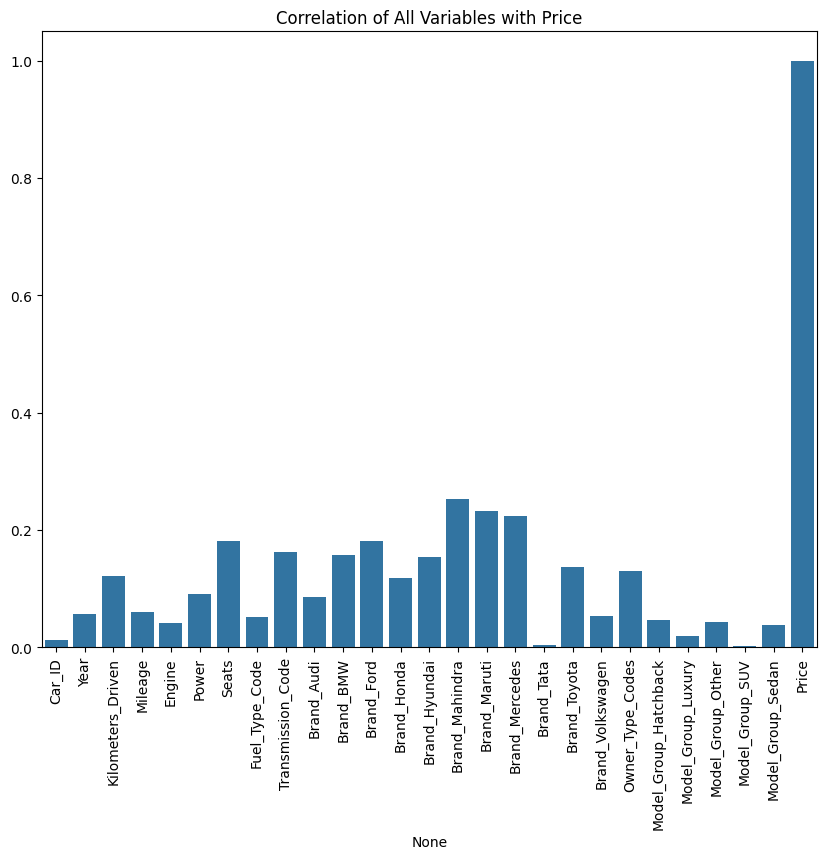

In [ ]:
# Визуализация корреляций для 'Price'
plt.figure(figsize=(10, 8))
sns.barplot(x=all_correlations.index, y=all_correlations.values)
plt.xticks(rotation=90)  # Поворот наименований переменных на 90 градусов для лучшей читаемости
plt.title('Correlation of All Variables with Price')
plt.show()

 Висновок: жодна з колонок не має кореляції з Price, яка перевищує 0.5 за модулем. Це може свідчити про те, що жодна з колонок не має значного прямого впливу на цільову змінну.Таким чином, це може свідчити про нелінійні взаємозв'язки або важливість більш складних моделей для визначення впливу на Price.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [ ]:
# Видалення всіх НЕчислових колонок з X_train та X_test
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Тренування лінійної регресії на числових даних тренувального набору X_train
model = LinearRegression()
model.fit(X_train, y_train)

# Передбачення на X_train та X_test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Обчислення RMSE для передбачень
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 192816.87932478
Test RMSE: 207802.9371268367


In [ ]:
# Коефіцієнти моделі
coefficients = model.coef_
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

                  Feature  Coefficient
9              Brand_Audi    793418.26
10              Brand_BMW    768327.76
16         Brand_Mercedes    706710.37
14         Brand_Mahindra   -629893.39
15           Brand_Maruti   -457708.58
13          Brand_Hyundai   -373010.50
11             Brand_Ford   -302319.24
7          Fuel_Type_Code   -287510.84
8       Transmission_Code    270785.07
25      Model_Group_Sedan   -262169.35
19       Brand_Volkswagen   -259113.89
22     Model_Group_Luxury    209660.97
17             Brand_Tata   -196500.67
24        Model_Group_SUV    150631.82
12            Brand_Honda   -143009.28
21  Model_Group_Hatchback   -110917.69
18           Brand_Toyota     93099.16
20       Owner_Type_Codes     64766.89
1                    Year     41251.09
3                 Mileage    -27250.31
23      Model_Group_Other     12794.25
5                   Power      5517.48
6                   Seats      4828.78
0                  Car_ID       445.31
4                  Engine

In [ ]:
# Підрахунок основних статистичних показників для `Price`
price_min = y.min()
price_max = y.max()
price_mean = y.mean()

print(f"Min Price: {price_min}")
print(f"Max Price: {price_max}")
print(f"Mean Price: {price_mean}")

Min Price: 450000
Max Price: 4000000
Mean Price: 1574000.0


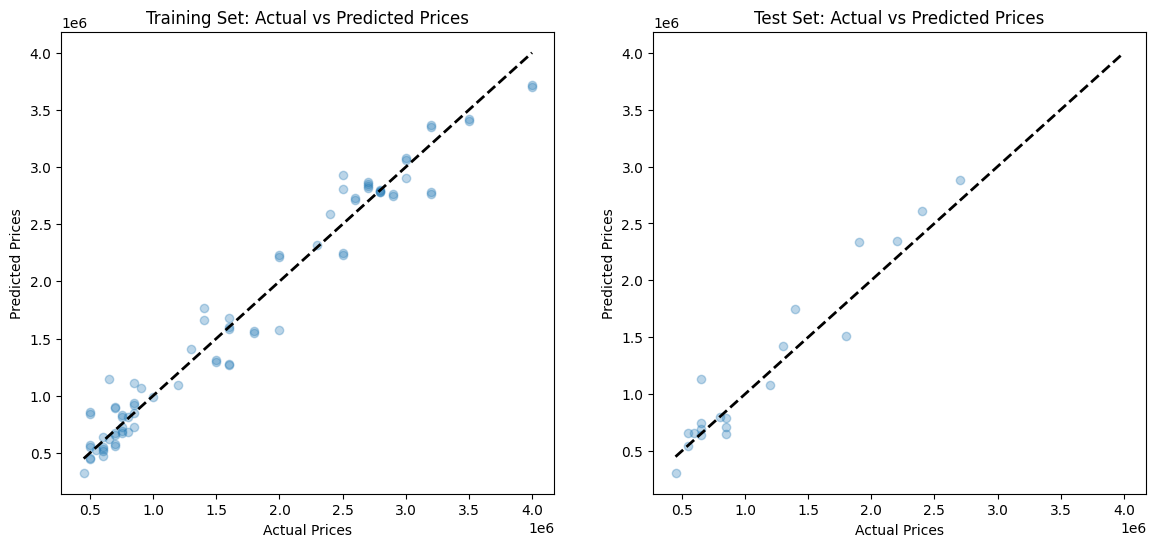

In [ ]:
# Побудова графіків розсіювання передбачень проти реальних даних
plt.figure(figsize=(14, 6))

# Графік для тренувального набору
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Training Set: Actual vs Predicted Prices")

# Графік для тестового набору
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test Set: Actual vs Predicted Prices")

plt.show()

Висновки:
1. Середнє значення Price становить 1574000. RMSE на тренувальних і тестових даних є значно меншим за середнє значення Price, що свідчить про те, що модель робить відносно невеликі помилки в передбаченнях.
2. Діапазон цін становить від 450000 до 4000000. RMSE на тренувальних і тестових даних також є значно меншим за максимальне значення Price, що свідчить про прийнятний рівень помилок.
3. На графіку більшість точок лежать близько до діагоналі (лінія y=x), що вказує на гарну відповідність між фактичними і передбаченими значеннями.
Модель добре навчилася на тренувальному наборі даних, оскільки RMSE є досить низьким.
4. На 2 графіку більшість точок також лежать близько до діагоналі, але є більше розкиду порівняно з тренувальним набором.
Це вказує на те, що модель має трохи більші відхилення при передбаченні нових даних, але RMSE залишається відносно низьким.

На загал: Модель лінійної регресії показала хороші результати на тренувальному і тестовому наборах даних. RMSE значення є низькими як для тренувальних, так і для тестових даних, що свідчить про те, що модель добре передбачає ціни автомобілів. Графіки розсіювання підтверджують, що більшість передбачень близькі до фактичних значень. Незважаючи на трохи більший розкид на тестовому наборі, модель все ще демонструє прийнятні результати. Тако ж необхіно вразувати, шо наявний низькій кореляції,тому, можливо для покращення точності прогнозів необхідно розширити набір ознак і розглянути використання більш складних моделей.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [ ]:
# Масштабування даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Тренування лінійної регресії на відмасштабованих даних тренувального набору X_train
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Передбачення на X_train та X_test
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Обчислення RMSE для передбачень
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE (scaled): {train_rmse}")
print(f"Test RMSE (scaled): {test_rmse}")

Train RMSE (scaled): 192816.87932478054
Test RMSE (scaled): 207802.93712682746


In [ ]:
# Коефіцієнти моделі
coefficients = model.coef_
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

                  Feature  Coefficient
5                   Power    449251.38
10              Brand_BMW    220482.48
9              Brand_Audi    216858.80
16         Brand_Mercedes    201012.58
14         Brand_Mahindra   -152659.32
7          Fuel_Type_Code   -143710.49
8       Transmission_Code    131920.90
15           Brand_Maruti   -127872.40
11             Brand_Ford   -117821.22
13          Brand_Hyundai   -116831.47
19       Brand_Volkswagen    -93153.51
3                 Mileage    -92945.51
17             Brand_Tata    -88320.56
25      Model_Group_Sedan    -78547.06
22     Model_Group_Luxury     69453.21
12            Brand_Honda    -51695.83
1                    Year     46232.40
20       Owner_Type_Codes     42346.85
24        Model_Group_SUV     39766.20
2       Kilometers_Driven    -39172.04
21  Model_Group_Hatchback    -38078.13
0                  Car_ID     12587.64
18           Brand_Toyota      6763.07
23      Model_Group_Other      6518.50
4                  Engine

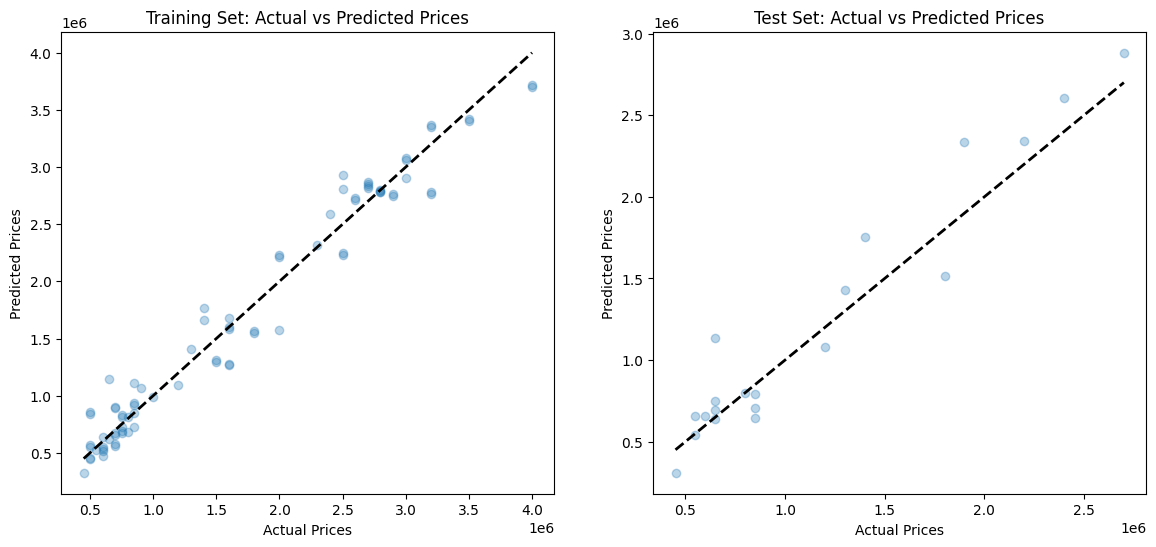

In [205]:
# Побудова графіків розсіювання передбачень проти реальних даних
plt.figure(figsize=(14, 6))

# Графік для тренувального набору
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Training Set: Actual vs Predicted Prices")

# Графік для тестового набору
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test Set: Actual vs Predicted Prices")

plt.show()

Найвпливовіші колонки за коефіцієнтами:
- Power: 449251.38
- Brand_BMW: 220482.48
- Brand_Audi: 216858.80
- Brand_Mercedes: 201012.58
- Brand_Mahindra: -152659.32
- Fuel_Type_Code: -143710.49
- Transmission_Code: 131920.90
- Brand_Maruti: -127872.40
- Brand_Ford: -117821.22
- Brand_Hyundai: -116831.47

Аналіз напрямку дії найважливіших коефіцієнтів:
1. Power (449251.38):
- Позитивний коефіцієнт.
- Логічно, що потужність автомобіля значно впливає на його ціну, оскільки більш потужні автомобілі, як правило, дорожчі.
2. Brand_BMW (220482.48), Brand_Audi (216858.80), Brand_Mercedes (201012.58):
- Позитивні коефіцієнти.
- Логічно, що автомобілі відомих преміум-брендів мають вищу ціну. Це відображає сприйняття якості, престижу та додаткових функцій, які надаються цими брендами.
3. Brand_Mahindra (-152659.32), Brand_Maruti (-127872.40), Brand_Ford (-117821.22), Brand_Hyundai (-116831.47):
- Негативні коефіцієнти.
- Логічно, що деякі бренди мають меншу ціну через позиціонування на ринку як більш доступні варіанти порівняно з преміум-брендами.
4. Fuel_Type_Code (-143710.49):
- Негативний коефіцієнт.
- Відображає, що автомобілі на дизельному паливі можуть бути дешевшими за автомобілі на бензині (Petrol = 1, Diesel = 0).
5. Transmission_Code (131920.90):
- Позитивний коефіцієнт.
- Логічно, що автомобілі з ручною трансмісією (Manual = 1) можуть мати меншу ціну порівняно з автоматичною трансмісією.


Загальний висновок:
Модель лінійної регресії виявила найбільш впливові ознаки на ціну автомобіля, деякі з яких є логічними та очікуваними. Потужність автомобіля та бренд мають найбільший вплив на ціну, що відповідає сприйняттю споживачів про якість та престиж автомобілів. Також тип палива і трансмісії вносять значний вклад у формування ціни, що також є логічним з точки зору вартості та експлуатаційних характеристик.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [206]:
# Додавання константи до набору даних
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
X_train_scaled_df = pd.DataFrame(X_train_scaled_with_const, columns=['const'] + list(X_train.columns))

# Скидання індексів
y_train = y_train.reset_index(drop=True)

# Тренування моделі з statsmodels
model_sm = sm.OLS(y_train, X_train_scaled_df).fit()

# Виведення звіту моделі
summary = model_sm.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     63.60
Date:                Wed, 22 May 2024   Prob (F-statistic):           7.53e-32
Time:                        20:33:27   Log-Likelihood:                -1087.1
No. Observations:                  80   AIC:                             2224.
Df Residuals:                      55   BIC:                             2284.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.68e+

In [ ]:
# Аналіз p-value коефіцієнтів
significant_features = model_sm.pvalues[model_sm.pvalues < 0.05]
significant_features_list = significant_features.index.tolist()

print("Статично значущі ознаки на рівні значущості 0.05:")
print(significant_features_list)

Статично значущі ознаки на рівні значущості 0.05:
['const', 'Power', 'Fuel_Type_Code', 'Transmission_Code', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Volkswagen', 'Model_Group_Luxury', 'Model_Group_Sedan']


Висновки:
- R-squared: 0.965. Це свідчить про те, що 96.5% варіацій у цільовій змінній (Price) пояснюються змінними моделі.
- Adj. R-squared: 0.950. Це скориговане значення R-squared, яке враховує кількість предикторів у моделі. Воно показує, що модель дуже добре підходить для даних.


На основі p-value ми визначили, що найбільш значущими ознаками, які впливають на ціну автомобіля, є потужність, бренд (особливо преміум-бренди), тип трансмісії, пробіг, а також деякі категорії моделей. Ці ознаки мають логічний вплив на ціну, підтверджуючи, що преміум-бренди та більша потужність підвищують ціну, тоді як доступніші бренди та більший пробіг знижують її.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [ ]:
# Перевірка існування колонок
existing_columns = X_train_scaled_df.columns.tolist()

# Фільтрація значущих ознак на основі наявності в DataFrame
available_significant_features = [feature for feature in significant_features_list if feature in existing_columns]

# Вибір значущих існуючих ознак
X_train_significant = X_train_scaled_df[available_significant_features]
X_train_significant

,const,Power,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Volkswagen,Model_Group_Luxury,Model_Group_Sedan
0,1.00,-0.23,0.98,0.80,-0.33,-0.36,-0.36,-0.28,-0.23,-0.26,-0.36,3.23,-0.38,-0.33
1,1.00,0.25,-1.03,0.80,3.00,-0.36,-0.36,-0.28,-0.23,-0.26,-0.36,-0.31,-0.38,-0.33
2,1.00,0.91,0.98,0.80,3.00,-0.36,-0.36,-0.28,-0.23,-0.26,-0.36,-0.31,-0.38,-0.33
3,1.00,-0.78,0.98,-1.26,-0.33,-0.36,-0.36,-0.28,-0.23,-0.26,-0.36,3.23,-0.38,-0.33
4,1.00,0.91,0.98,0.80,-0.33,-0.36,-0.36,-0.28,-0.23,-0.26,2.81,-0.31,-0.38,-0.33
5,1.00,0.30,-1.03,0.80,-0.33,-0.36,-0.36,-0.28,-0.23,-0.26,2.81,-0.31,-0.38,-0.33
6,1.00,0.96,-1.03,0.80,3.00,-0.36,-0.36,-0.28,-0.23,-0.26,-0.36,-0.31,-0.38,-0.33
7,1.00,-1.01,0.98,-1.26,-0.33,-0.36,-0.36,-0.28,-0.23,-0.26,-0.36,-0.31,-0.38,-0.33
8,1.00,-0.23,0.98,0.80,3.00,-0.36,-0.36,-0.28,-0.23,-0.26,-0.36,-0.31,-0.38,-0.33
9,1.00,-0.64,-1.03,-1.26,-0.33,-0.36,-0.36,-0.28,4.36,-0.26,-0.36,-0.31,-0.38,-0.33


In [ ]:
# Тренування моделі з statsmodels
model_sm_significant= sm.OLS(y_train, X_train_significant).fit()

# Виведення звіту моделі
summary = model_sm_significant.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     91.12
Date:                Wed, 22 May 2024   Prob (F-statistic):           6.76e-37
Time:                        20:15:44   Log-Likelihood:                -1103.8
No. Observations:                  80   AIC:                             2236.
Df Residuals:                      66   BIC:                             2269.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.92

- Модель із всіма зміннимимала такі значення: R-squared (0.965) і  Adjusted R-squared (0.950)
- Модель із статистично значущими змінними має такі значення R-squared (0.947) вказує, що навіть із значно меншою кількістю змінних, 94.7% варіацій у ціні можуть бути пояснені, що недалеко від повної моделі. Adjusted R-squared (0.937) майже такий же високий, як і для повної моделі, що свідчить про ефективність вибору лише статистично значущих змінних.
- Таким чином обидві моделі демонструють високу ефективність, але модель із статистично значущими змінними забезпечує майже таку ж точність з меншою кількістю змінних. Це може сприяти кращій інтерпретації та уникненню можливої мультиколінеарності.
- У ситуаціях, де простота та зрозумілість моделі є ключовими, модель із обмеженою кількістю статистично значущих змінних може бути більш доцільною, хоча вона і втрачає незначну частку пояснювальної сили порівняно з повною моделлю.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [207]:
# Аналіз p-value коефіцієнтів
significant_features_soft = model_sm.pvalues[model_sm.pvalues < 0.25]
significant_features_list_soft = significant_features_soft.index.tolist()

print("Статично значущі ознаки на рівні значущості 0.25:")
print(significant_features_list_soft)

Статично значущі ознаки на рівні значущості 0.25:
['const', 'Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata', 'Brand_Volkswagen', 'Model_Group_Luxury', 'Model_Group_SUV', 'Model_Group_Sedan']


In [208]:
# Фільтрація значущих ознак на основі наявності в DataFrame
available_significant_features_soft = [feature for feature in significant_features_list_soft if feature in significant_features_list_soft]

# Вибір значущих існуючих ознак
X_train_significant_soft = X_train_scaled_df[available_significant_features_soft]
X_train_significant_soft

,const,Mileage,Power,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Volkswagen,Model_Group_Luxury,Model_Group_SUV,Model_Group_Sedan
0,1.00,0.27,-0.23,0.98,0.80,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,3.23,-0.38,-0.28,-0.33
1,1.00,-0.02,0.25,-1.03,0.80,3.00,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.31,-0.38,-0.28,-0.33
2,1.00,-0.60,0.91,0.98,0.80,3.00,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.31,-0.38,-0.28,-0.33
3,1.00,0.27,-0.78,0.98,-1.26,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,3.23,-0.38,-0.28,-0.33
4,1.00,-1.48,0.91,0.98,0.80,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,2.81,-0.38,-0.31,-0.38,3.51,-0.33
5,1.00,-0.31,0.30,-1.03,0.80,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,2.81,-0.38,-0.31,-0.38,-0.28,-0.33
6,1.00,-0.90,0.96,-1.03,0.80,3.00,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.31,-0.38,-0.28,-0.33
7,1.00,0.86,-1.01,0.98,-1.26,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,2.65,-0.31,-0.38,-0.28,-0.33
8,1.00,-0.31,-0.23,0.98,0.80,3.00,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.31,-0.38,-0.28,-0.33
9,1.00,0.86,-0.64,-1.03,-1.26,-0.33,-0.36,-0.36,-0.26,-0.28,4.36,-0.26,-0.36,-0.38,-0.31,-0.38,-0.28,-0.33


In [209]:
# Тренування моделі з statsmodels
model_sm_significant_soft = sm.OLS(y_train, X_train_significant_soft).fit()

# Виведення звіту моделі
summary = model_sm_significant_soft.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     93.05
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.59e-37
Time:                        20:43:01   Log-Likelihood:                -1090.3
No. Observations:                  80   AIC:                             2217.
Df Residuals:                      62   BIC:                             2260.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.55

Аналіз коєфіцієнтів:
1. Коефіцієнти вказують на вплив кожної змінної на цільову змінну. Наприклад, значення коефіцієнту для Power є позитивним, що означає, що зі збільшенням потужності автомобіля, його ціна, як правило, зростає.
2. Змінні, як Brand_BMW та Brand_Mercedes мають високі позитивні коефіцієнти, що підтверджує очікування, що ці марки є більш вартісними порівняно з іншими.
3. p-значенням < 0.05 вважаються статистично значущими. Це включає Power, Fuel_Type_Code, Transmission_Code, та деякі марки автомобілів, як Audi, BMW, і Mercedes.
4. Особлива увага має бути приділена змінним з високими p-значеннями, як Mileage та Brand_Honda, оскільки їх вплив може бути не стільки визначеним, скільки випадковим.

Модель показує наступні характеристики:
- R-squared: 0.962
- Adjusted R-squared: 0.952

Ці показники вказують на дуже високу якість моделі, де 96.2% варіації ціни пояснюється змінними, включеними в модель, і скоригований R-квадрат враховує кількість предикторів, підтверджуючи, що додавання змінних не перенавантажує модель.

**Аналіз та рекомендації по всім 3 моделям:**
- Модель з усіма змінними показує найвищі значення R-squared та Adjusted R-squared, що свідчить про її високу пояснювальну силу. Однак, вона також несе ризик перенавчання та мультиколінеарності через велику кількість змінних.

- Модель зі статистично значущими змінними пропонує меншу кількість змінних, що може сприяти кращій інтерпретації та уникненню мультиколінеарності. Вона втрачає дещо в пояснювальній силі порівняно з повною моделлю, але зберігає високий Adjusted R-squared.

- Soft model (p-value < 0.25) показує майже такі ж високі значення R-squared та Adjusted R-squared, як і повна модель, але потенційно з меншою кількістю змінних. Ця модель може забезпечувати хороший баланс між складністю та пояснювальною силою, якщо вона виключає деякі менш значущі змінні.

Вибір між цими моделями залежить від конкретних потреб вашого застосування:

- Якщо ключовим є максимальна точність прогнозування та комплексність моделі не є критичною проблемою, то можна вибрати модель з усіма змінними.
- Якщо важливі простота, зрозумілість та уникнення перенавчання, то кращим вибором може бути модель зі статистично значущими змінними або soft model.
- Оскільки модель з критерієм p-value < 0.25 демонструє високу пояснювальну силу при потенційно меншій кількості змінних, це може бути найбільш збалансований вибір для багатьох застосувань, де важлива як точність, так і уникнення складності.